In [153]:
# PREPROCESSING (Categorical encoding, missing value imputation, scaling)

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, MaxAbsScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Clinical data/clinical_data.csv", index_col=0)

# Separate categorical and numerical
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

# Impute missing values
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])
df[num_cols] = SimpleImputer(strategy="mean").fit_transform(df[num_cols])

for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

# Combine and scale
scaler = MaxAbsScaler()
df[num_cols] = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

df.head()

,histology_diagnosis,age,sex,race,participant_country,tumor_site,tumor_size_cm,tumor_necrosis,lymph_vascular_invasion,perineural_invasion,...,residual_tumor,tumor_stage_pathological,additiol_pathologic_findings,bmi,alcohol_consumption,tobacco_smoking_history,follow_up_days,vital_status,is_this_patient_lost_to_follow_up,cause_of_death
case_id,,,,,,,,,,,,,,,,,,,,,
C3L-00017,1,0.811765,1,1,11,2,0.600000,0,1,2,...,3,2,10,0.618809,0,0,0.312317,1,1,7
C3L-00102,1,0.494118,1,1,11,2,0.400000,0,2,2,...,0,4,2,0.587606,1,4,0.182551,0,0,7
C3L-00189,1,0.800000,0,1,1,2,0.360000,0,1,2,...,1,3,20,0.747982,0,1,0.758798,0,0,7
C3L-00277,1,0.811765,1,1,6,4,0.666667,0,1,2,...,2,3,6,0.523674,0,4,0.447214,0,1,7
C3L-00401,1,0.729412,0,1,1,0,0.373333,0,2,2,...,0,3,1,0.489199,0,4,0.900293,1,0,7


In [154]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['vital_status'])
Y = df['vital_status']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100, ), max_iter=300, random_state=42)
}

In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

results = {}

for name, model in models.items():
    # Train model
    model.fit(x_train, y_train)
    # Predict
    y_pred = model.predict(x_test)
    # Evaluate
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0)
    }

results_df = pd.DataFrame(results)

results_df = results_df.transpose()*100

results_df

c:\Users\pietr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Accuracy,Precision,Recall
Naive Bayes,67.857143,57.142857,100.000000
Random Forest,75.000000,69.230769,75.000000
K-Nearest Neighbors,67.857143,66.666667,50.000000
Neural Network,75.000000,72.727273,66.666667


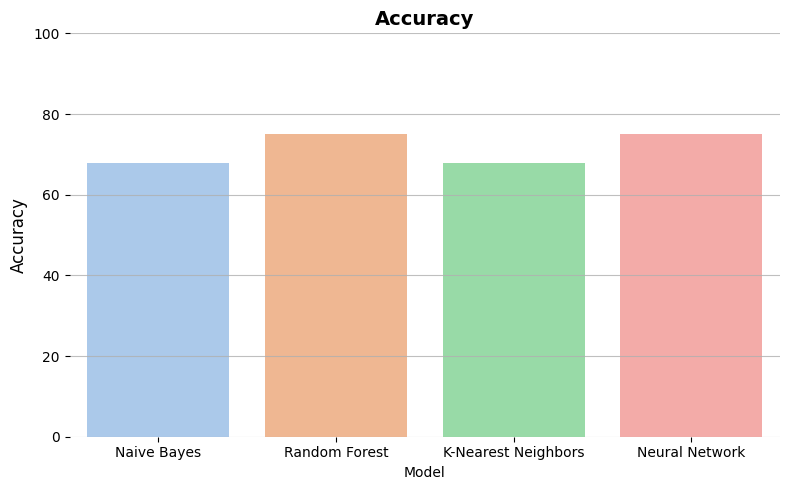

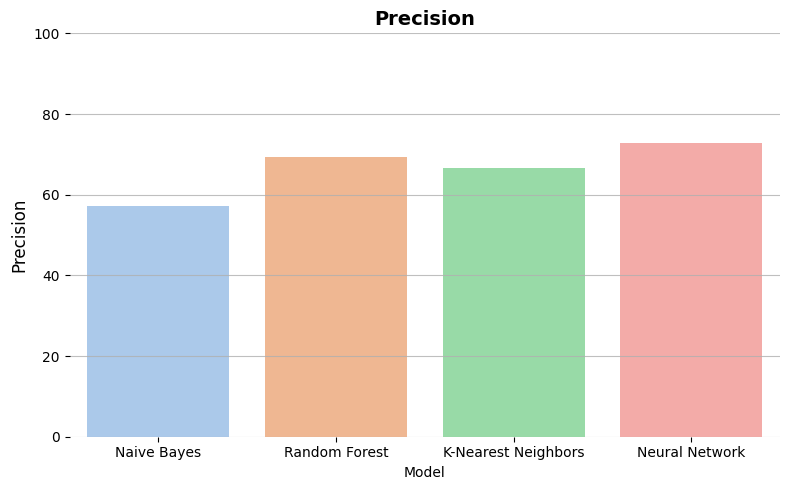

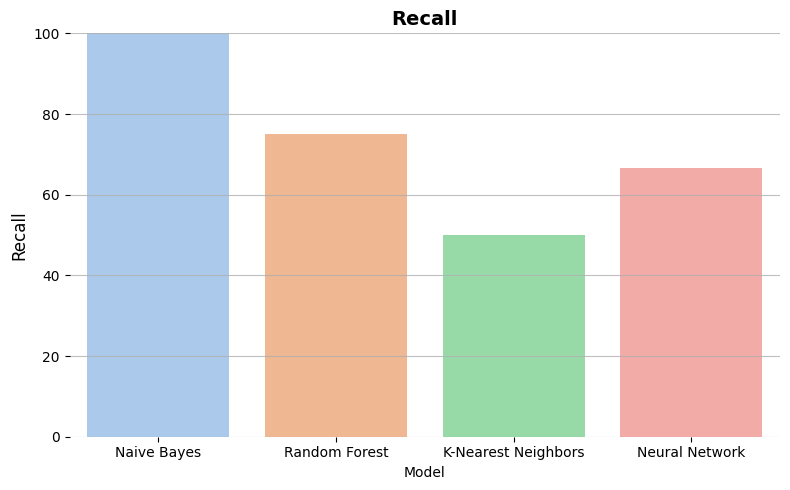

In [157]:
import seaborn as sns

def barplot(series, column):
    df_plot = pd.DataFrame({
        "Model": series.index,
        column: series.values
    })

    plt.figure(figsize=(8,5))

    ax = sns.barplot(
        data=df_plot,
        x="Model",
        y=column,
        hue="Model",
        palette="pastel",
        legend=False,
        dodge=False
    )

    ax.set_title(column, fontsize=14, weight='bold')
    ax.set_ylabel(column, fontsize=12)
    ax.set_xlabel("Model")

    sns.despine(left=True, bottom=True)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.grid(axis='y', alpha=0.8)
    plt.savefig(rf'images/modelStats/{column}.png', transparent=True, bbox_inches='tight')


barplot(results_df['Accuracy'], 'Accuracy')
barplot(results_df['Precision'], 'Precision')
barplot(results_df['Recall'], 'Recall')


C:\Users\pietr\AppData\Local\Temp\ipykernel_23356\4276067668.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([20,40,60,80,100],fontsize=10, weight='bold')


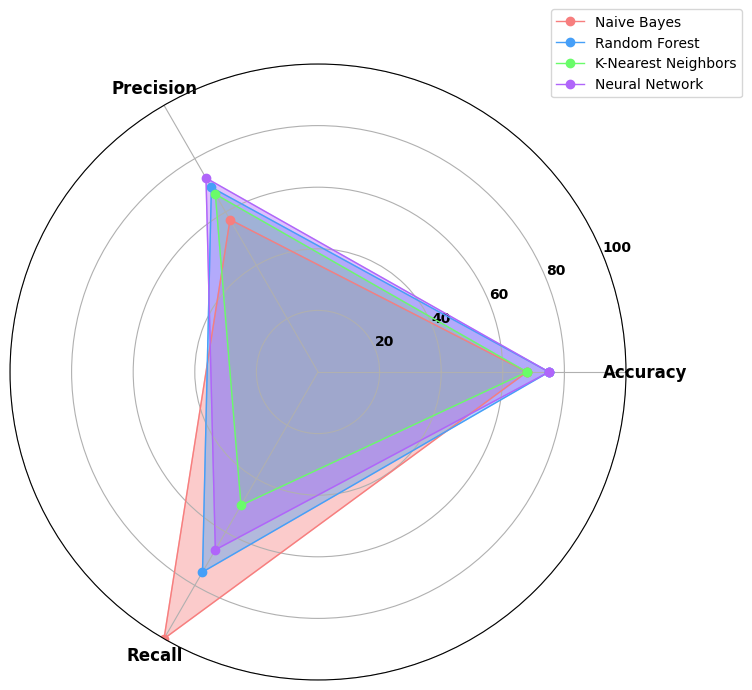

<Figure size 640x480 with 0 Axes>

In [158]:
import numpy as np

def radar_plot_all(df):
    labels = df.columns
    num_vars = len(labels)

    angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    angles = np.concatenate((angles, [angles[0]]))

    plt.figure(figsize=(12,8))
    ax = plt.subplot(111, polar=True)

    my_colors = ["#f77e7e", "#469ff8", "#6afc6a", "#b065faff"]
    colors = my_colors[:len(df)]

    for (model, color) in zip(df.index, colors):
        values = df.loc[model].values
        values = np.concatenate((values, [values[0]]))
        ax.plot(angles, values, label=model, color=color, linewidth=1, linestyle='-', marker='o')
        ax.fill(angles, values, color= color,alpha=0.4)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12, weight='bold', rotation=30)
    ax.set_yticklabels([20,40,60,80,100],fontsize=10, weight='bold')
    ax.set_ylim(0,100)
    plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1))

    plt.show()
    plt.savefig(rf'images/modelStats/radarPlot.png', transparent=True, bbox_inches='tight')

radar_plot_all(results_df)
